In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth

In [2]:
# Load the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, 3:5].values

In [3]:
# Apply Mean Shift clustering
bandwidth = estimate_bandwidth(X, quantile=0.2)  # Estimate optimal bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_

C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Lenovo\anaconda3\envs\aiml\lib\site-packages\sklearn\neighbors\base.py:737: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < LooseVersion('0.12'):
C:\Users\Lenovo\anaconda3\envs\aiml\li

In [4]:
# Evaluate results
cluster_centers = ms.cluster_centers_
n_clusters = len(np.unique(labels))

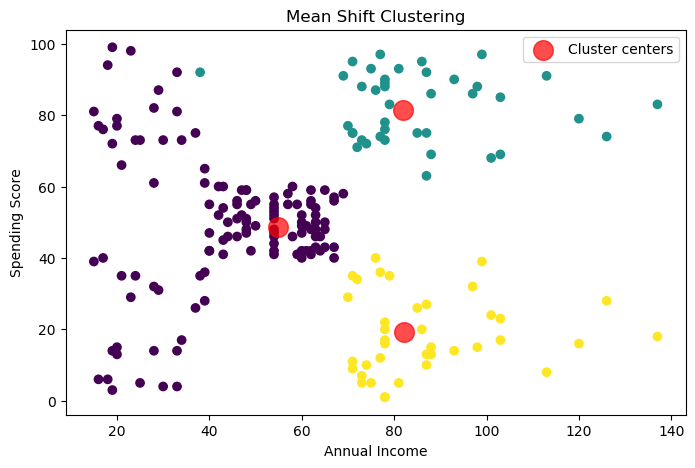

In [5]:
# Visualize clusters
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', alpha=0.7, label='Cluster centers')
plt.title('Mean Shift Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [6]:
# Add cluster labels to the dataset
supervised = dataset
supervised['Cluster_group'] = labels

In [7]:
# Export results
supervised.to_csv("ML cluster_mean_shift.csv", index=False)

In [8]:
# Print cluster centers and information
print(f"Number of clusters: {n_clusters}")
print(f"Cluster centers:\n{cluster_centers}")
print(f"Cluster labels:\n{labels}")

Number of clusters: 3
Cluster centers:
[[54.95402299 48.73563218]
 [81.88888889 81.5       ]
 [82.2        19.37142857]]
Cluster labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
